In [18]:
# simple forward Euler solver for the 1D heat equation
#   u_t = kappa u_xx  0<x<L, 0<t<T
# with zero-temperature boundary conditions
#   u=0 at x=0,L, t>0
# and prescribed initial temperature
#   u=u_I(x) 0<=x<=L,t=0

In [19]:
import numpy as np
import pylab as pl
from math import pi
from scipy.sparse import diags

In [20]:
# Set problem parameters/functions
kappa = 1.0  # diffusion constant
L=1.0         # length of spatial domain
T=0.5        # total time to solve for

In [21]:
def u_I(x):
    # initial temperature distribution
    y = np.sin(pi*x/L)
    return y

In [22]:
# change the initial condition — for example, to u(x, 0) = sinp(πx) for some integer p
#p = 2
#def u_I(x):
    # initial temperature distribution
    #y = (np.sin(pi*x))**p
    #return y

In [23]:
def u_exact(x,t):
    # the exact solution
    y = np.exp(-kappa*(pi**2/L**2)*t)*np.sin(pi*x/L)
    return y

In [24]:
# Set numerical parameters
mx = 10  # number of gridpoints in space
mt = 1000  # number of gridpoints in time

In [25]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number
print("deltax=",deltax)
print("deltat=",deltat)
print("lambda=",lmbda)

deltax= 0.1
deltat= 0.0005
lambda= 0.04999999999999999


In [26]:
# Set up the solution variables
u_j = np.zeros(x.size)        # u at current time step
u_jp1 = np.zeros(x.size)      # u at next time step

In [27]:
# Set initial condition
for i in range(0, mx+1):
    u_j[i] = u_I(x[i])

In [28]:
# Solve the PDE: loop over all time points
for j in range(0, mt):
    # Forward Euler timestep at inner mesh points
    # PDE discretised at position x[i], time t[j]
    for i in range(1, mx):
        u_jp1[i] = u_j[i] + lmbda*(u_j[i-1] - 2*u_j[i] + u_j[i+1])
    
    # Boundary conditions
    u_jp1[0] = 0; u_jp1[mx] = 0
        
    # Save u_j at time t[j+1]
    u_j[:] = u_jp1[:]

<function matplotlib.pyplot.show(close=None, block=None)>

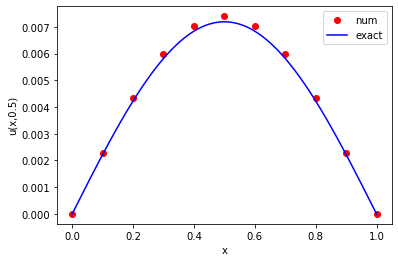

In [29]:
# Plot the final result and exact solution
pl.plot(x,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [30]:
# The forward euler is unstable when lambda > 1/2 

In [31]:
# steady state of the PDE problem is zero

In [32]:
# plot in 3d (not working currently)
#%matplotlib inline
#import matplotlib.pyplot as plt
#ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

#ax.scatter3D(xx,u_exact(xx,T), T, cmap='Greens');

In [33]:
#Modify code to replace the component-wise forward Euler method with the matrix/vector approach
#u_j = np.zeros((mx+1,1))
#k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
#offset = [-1,0,1]
#A = diags(k,offset).toarray()

#for j in range(0, mt):
    # Forward Euler timestep at inner mesh points
    # PDE discretised at position x[i], time t[j]
    #u_jp1[1:-1] = A* u_j[1:-1]
                                                             # Boundary condition 
    # Save u_j at time t[j+1]
    #u_j[:] = u_jp1[:]


In [37]:
# Solve the PDE using the matrix approach: loop over all time points
u_jp1 = np.zeros((mx+1,1))
k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
offset = [-1,0,1]
A = diags(k,offset).toarray()


for j in range(0, mt):
    u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(9,1)
    u_j = u_jp1

<function matplotlib.pyplot.show(close=None, block=None)>

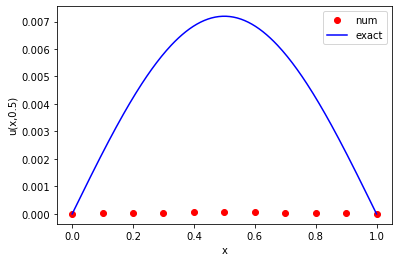

In [38]:
# Plot the final result and exact solution
pl.plot(x,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show